In [415]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")


import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  
import graphviz

In [2]:
! pip install pydotplus

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=515618674339408833d68b6c4c0b8908a7ffd161f4f693f0865310da2be5c62b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [3]:
! pip install graphviz

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [416]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### Overview
### The data has been split into two groups:

### training set (train.csv)
### test set (test.csv)
### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like  passengers’ gender and class. You can also use feature engineering to create new features.

### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### We also include gender_submission.csv, a set of predictions that assume all and only female passengers
### survive, as an example of what a submission file should look like.

In [3]:
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

SyntaxError: invalid syntax (<ipython-input-3-2a4601d3ef9a>, line 1)

In [417]:
# read the excel data file 
df = pd.read_csv("C:\\Users\\USER\\Desktop\\KAGGLECOMP\\train.csv")
# display the top 5 rows of the dataframe
df.head()

# Note: To display more rows, example 10, use head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [419]:
# 'dtypes' gives the data type for each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [420]:
# 'shape' function gives the total number of rows and columns in the data
df.shape

(891, 12)

In [421]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

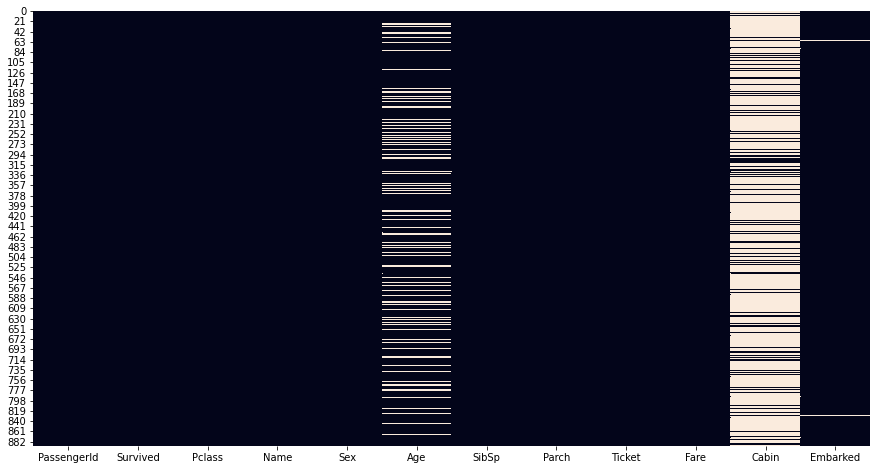

In [422]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [423]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [424]:
del df['Cabin']

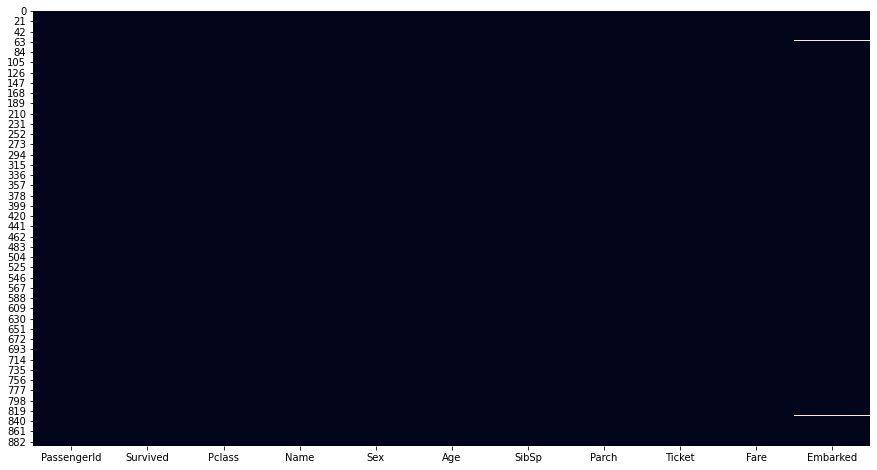

In [425]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [426]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


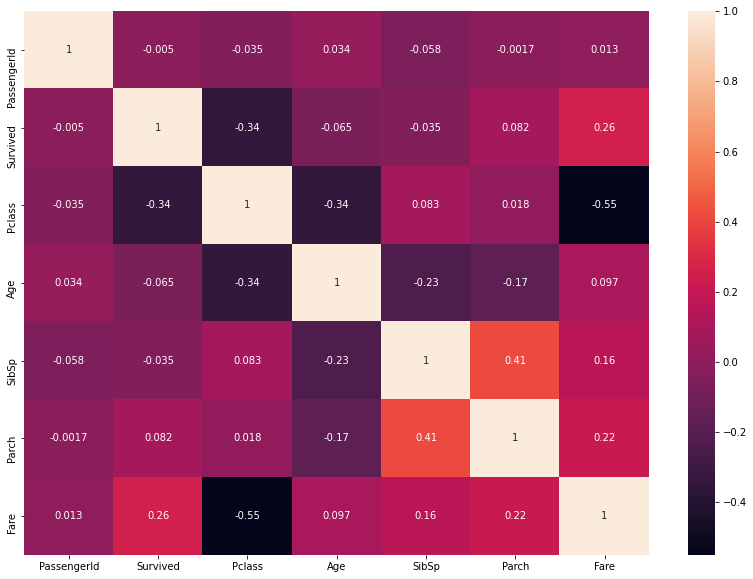

In [427]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:>

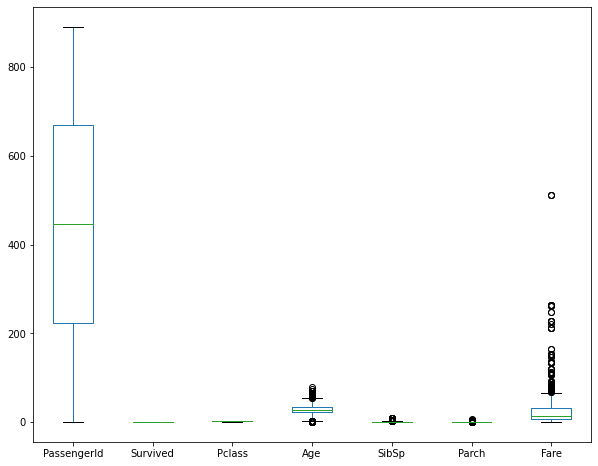

In [428]:
df.plot(kind='box', figsize= (10,8)) 

Text(0.5, 1.0, 'Histogram of Age')

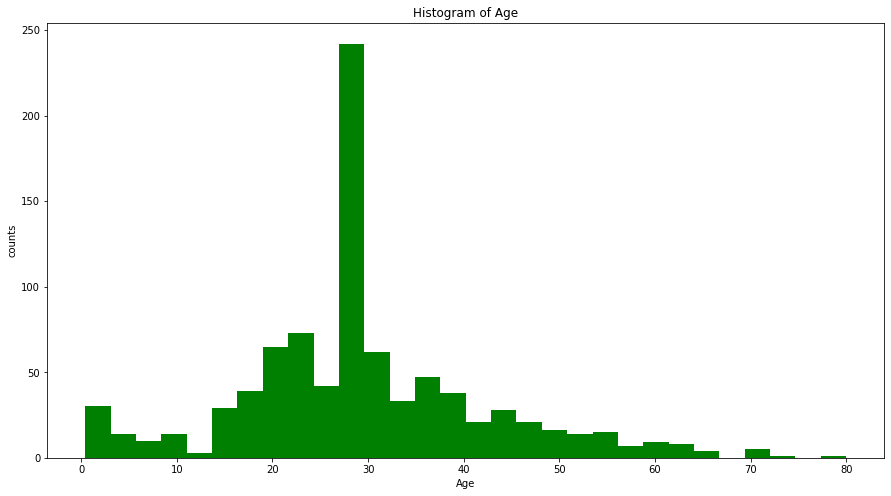

In [429]:
plt.hist(df.Age, bins = 'auto', facecolor = 'green')
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Histogram of Age')


<AxesSubplot:xlabel='Age'>

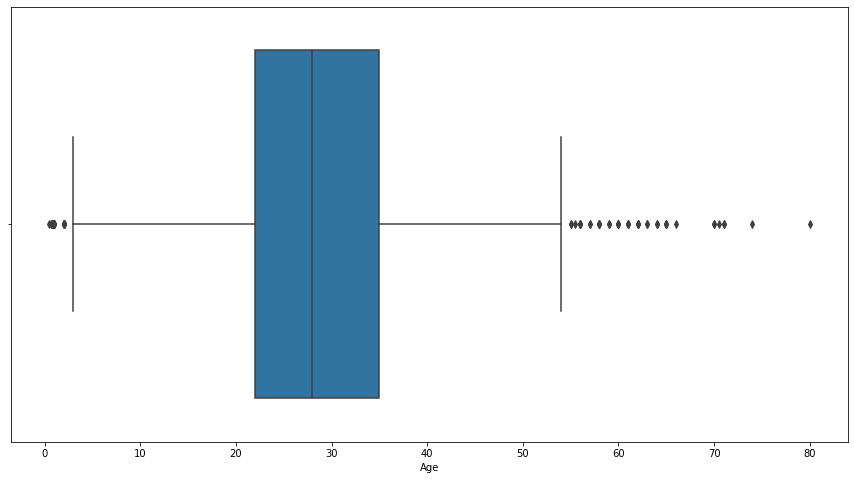

In [430]:
sns.boxplot(df['Age'])

<AxesSubplot:>

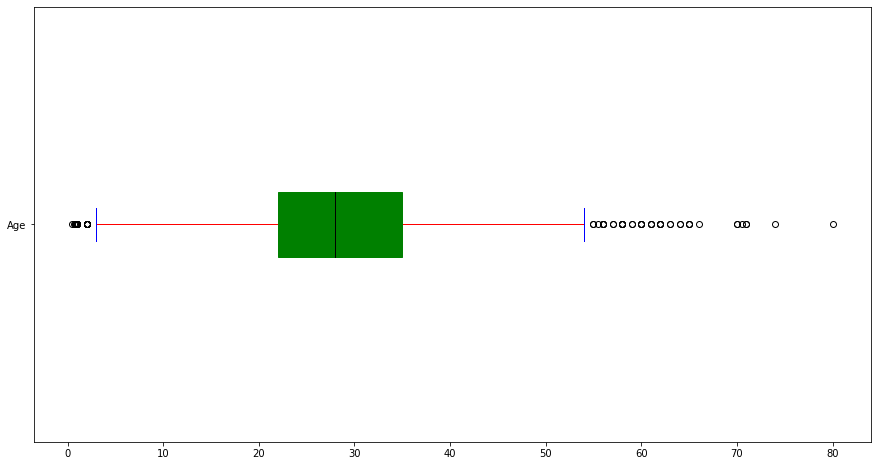

In [431]:
#____boxplot
props2 = dict(boxes = 'green', whiskers = 'red', medians = 'black', caps = 'blue')
df['Age'].plot.box(color=props2, patch_artist = True, vert = False)

In [432]:
#Getting the Iqr, up_lim & low_lim
iqr = df.Age.describe()['75%'] - df.Age.describe()['25%'] 
up_lim =df.Age.describe()['75%']+1.5*iqr 
up_lim

54.5

In [433]:
len(df.Age[df.Age > up_lim]) 


42

In [434]:
up_lim_ext = df.Age.describe()['75%']+3*iqr
up_lim_ext ###


74.0

In [435]:
len(df.Age[df.Age > up_lim_ext]) #16 Extreme outliers
#Removed extreme outliers - 10 Observations were removed
#hs = hs[hs.Property_Sale_Price <= 481000] 

1

In [436]:
#Removed extreme outliers - 10 Observations were removed
df1 = df[df.Age <= 74.0] 

In [437]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.4+ KB


In [438]:
Q1 = np.percentile(df.Age, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df.Age, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df.Age, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q2 50 percentile of the given data is, ', Q2) 
print('Q3 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR # 346
print('low_limit is', low_lim) 
print('up_limit is', up_lim) ###340000.0


Q1 25 percentile of the given data is,  22.0
Q2 50 percentile of the given data is,  28.0
Q3 75 percentile of the given data is,  35.0
Interquartile range is 13.0
low_limit is 2.5
up_limit is 54.5


In [439]:
len(df.Age[df.Age > 35])

217

In [440]:
len(df.Age[df.Age > 35])
df1 = df[df.Age < 35]
df1.Age


0      22.0
2      26.0
5      28.0
7       2.0
8      27.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 656, dtype: float64

In [441]:
df1 = df[df.Age < 74.0]

In [442]:
df1 = df[df.Age > 35]

<AxesSubplot:>

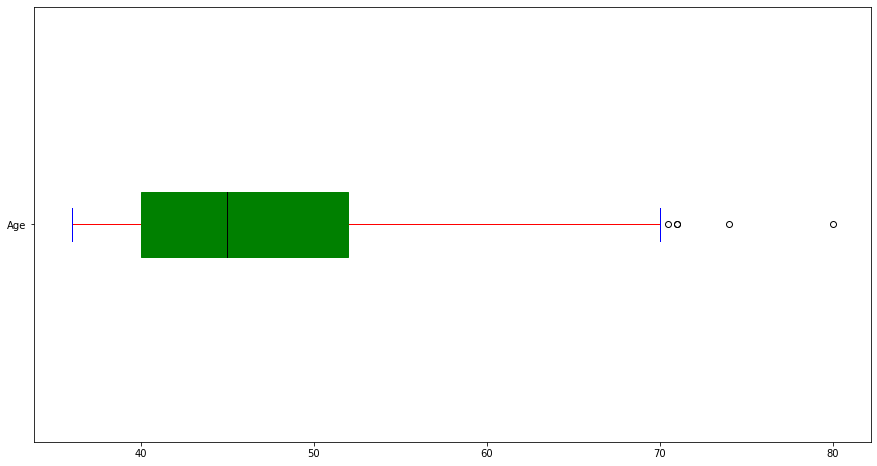

In [443]:
#____boxplot
props2 = dict(boxes = 'green', whiskers = 'red', medians = 'black', caps = 'blue')
df1['Age'].plot.box(color=props2, patch_artist = True, vert = False)

In [444]:
df1.Age

1      38.0
6      54.0
11     58.0
13     39.0
15     55.0
       ... 
865    42.0
871    47.0
873    47.0
879    56.0
885    39.0
Name: Age, Length: 217, dtype: float64

In [445]:
# Find all variables that are numerical
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables'.format(len(numerical)))

There are 7 numerical variables


In [446]:
# Extract the numerical-categorical variables from the numerical list
""" numerical_categorical variables are expected to have very few and finite unique variables.20 is used as the
    maximum limit for the numerical_categorical variables in this dataset but is not considered to be the standard"""
numerical_discrete = []

for var in numerical:
      if len(df[var].unique())<=20:
            print(var, ' values: ', df[var].unique())
            numerical_discrete.append(var)
print()
print('There are {} numerical-discrete variables'.format(len(numerical_discrete)))

Survived  values:  [0 1]
Pclass  values:  [3 1 2]
SibSp  values:  [1 0 3 4 2 5 8]
Parch  values:  [0 1 2 5 3 4 6]

There are 4 numerical-discrete variables


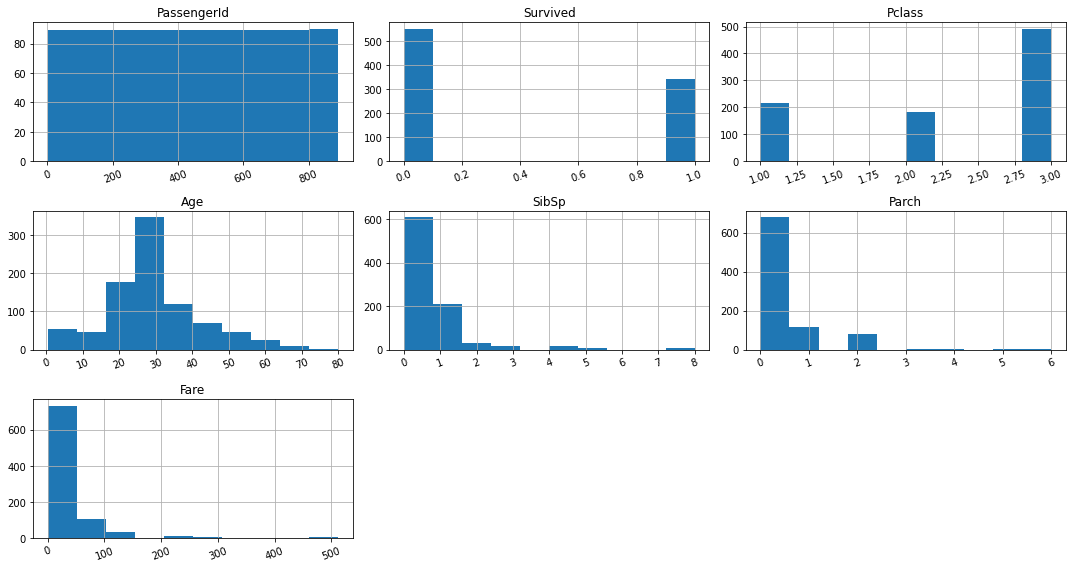

In [447]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [448]:
#selecting numerical variables
numerical_features = list(df.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Id']))
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)

Numerical Columns:  ['Age', 'SibSp', 'Pclass', 'Parch', 'Survived', 'Fare', 'PassengerId']

Categorical Columns:  ['Name', 'Sex', 'Ticket', 'Embarked']


In [449]:
#selecting categorical vairables
categorical_features = list(df.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)


Categorical Columns:  ['Name', 'Sex', 'Ticket', 'Embarked']


In [450]:
"""charges will be used later on as a target for regression analysis, so i'll skip it"""
numerical_continuous = [var for var in numerical if var not in numerical_discrete and var != 'charges']
print('There are {} numerical-continuous variables'.format(len(numerical_continuous))) 
numerical_continuous

There are 3 numerical-continuous variables


['PassengerId', 'Age', 'Fare']

<AxesSubplot:>

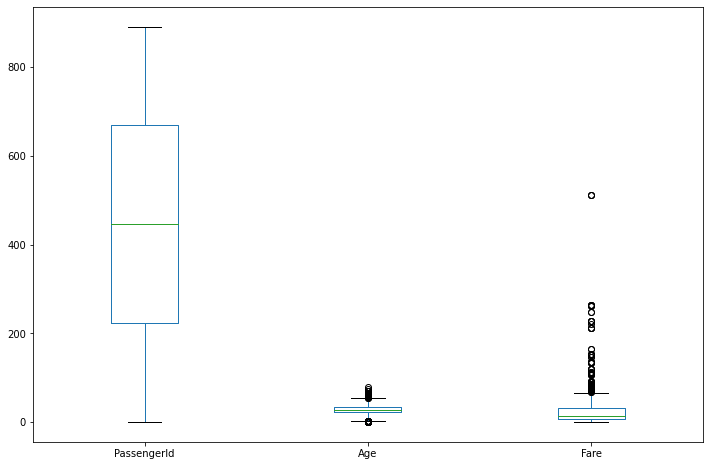

In [451]:
df[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

<AxesSubplot:>

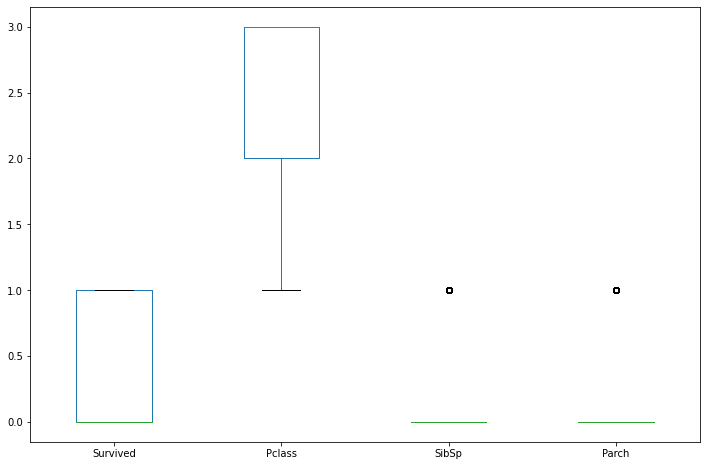

In [452]:
df_clean[numerical_discrete].plot(kind = 'box', figsize = (12, 8))

In [453]:
df_clean = df.copy()

In [454]:
from scipy import stats
for var in df:
    zscore = np.abs(stats.zscore(df[var]))
    print(zscore)

[1.73010796 1.72622007 1.72233219 1.71844431 1.71455642 1.71066854
 1.70678066 1.70289278 1.69900489 1.69511701 1.69122913 1.68734124
 1.68345336 1.67956548 1.67567759 1.67178971 1.66790183 1.66401395
 1.66012606 1.65623818 1.6523503  1.64846241 1.64457453 1.64068665
 1.63679876 1.63291088 1.629023   1.62513511 1.62124723 1.61735935
 1.61347147 1.60958358 1.6056957  1.60180782 1.59791993 1.59403205
 1.59014417 1.58625628 1.5823684  1.57848052 1.57459263 1.57070475
 1.56681687 1.56292899 1.5590411  1.55515322 1.55126534 1.54737745
 1.54348957 1.53960169 1.5357138  1.53182592 1.52793804 1.52405016
 1.52016227 1.51627439 1.51238651 1.50849862 1.50461074 1.50072286
 1.49683497 1.49294709 1.48905921 1.48517132 1.48128344 1.47739556
 1.47350768 1.46961979 1.46573191 1.46184403 1.45795614 1.45406826
 1.45018038 1.44629249 1.44240461 1.43851673 1.43462885 1.43074096
 1.42685308 1.4229652  1.41907731 1.41518943 1.41130155 1.40741366
 1.40352578 1.3996379  1.39575001 1.39186213 1.38797425 1.3840

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [455]:
df[numerical_continuous].apply(stats.zscore)

,PassengerId,Age,Fare
0,-1.730108,-0.565736,-0.502445
1,-1.726220,0.663861,0.786845
2,-1.722332,-0.258337,-0.488854
3,-1.718444,0.433312,0.420730
4,-1.714556,0.433312,-0.486337
...,...,...,...
886,1.714556,-0.181487,-0.386671
887,1.718444,-0.796286,-0.044381
888,1.722332,-0.104637,-0.176263
889,1.726220,-0.258337,-0.044381


In [456]:
df[numerical_discrete].apply(stats.zscore)

,Survived,Pclass,SibSp,Parch
0,-0.789272,0.827377,0.432793,-0.473674
1,1.266990,-1.566107,0.432793,-0.473674
2,1.266990,0.827377,-0.474545,-0.473674
3,1.266990,-1.566107,0.432793,-0.473674
4,-0.789272,0.827377,-0.474545,-0.473674
...,...,...,...,...
886,-0.789272,-0.369365,-0.474545,-0.473674
887,1.266990,-1.566107,-0.474545,-0.473674
888,-0.789272,0.827377,0.432793,2.008933
889,1.266990,-1.566107,-0.474545,-0.473674


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [458]:
df_clean = df.copy()

In [459]:
# Treating outliers in the columns that have outliers
zscore_Age = np.abs(stats.zscore(df['Age']))
df_clean['Age'] = df_clean['Age'][(zscore_Age < 1)]
zscore_Fare   = np.abs(stats.zscore(df['Fare']))
df_clean['Fare'] = df_clean['Fare'][(zscore_Fare < 1)]
zscore_SibSp   = np.abs(stats.zscore(df['SibSp']))
df_clean['SibSp'] = df_clean['SibSp'][(zscore_SibSp < 1)]

zscore_Parch    = np.abs(stats.zscore(df['Parch']))
df_clean['Parch'] = df_clean['Parch'][(zscore_Parch  < 1)]


In [460]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          662 non-null    float64
 6   SibSp        817 non-null    float64
 7   Parch        796 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         818 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

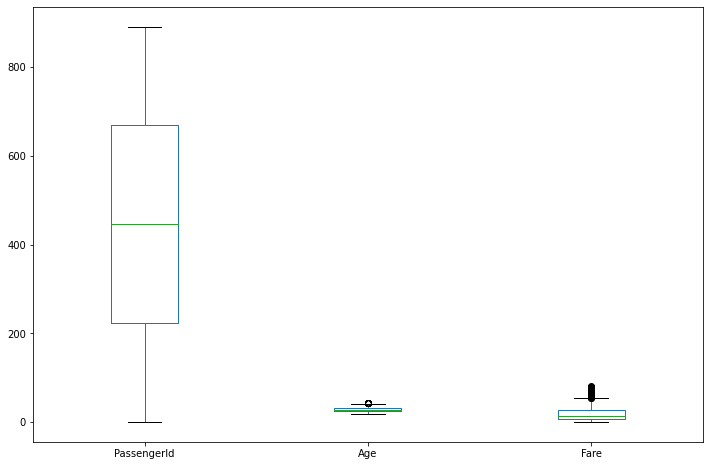

In [461]:
df_clean[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

<AxesSubplot:>

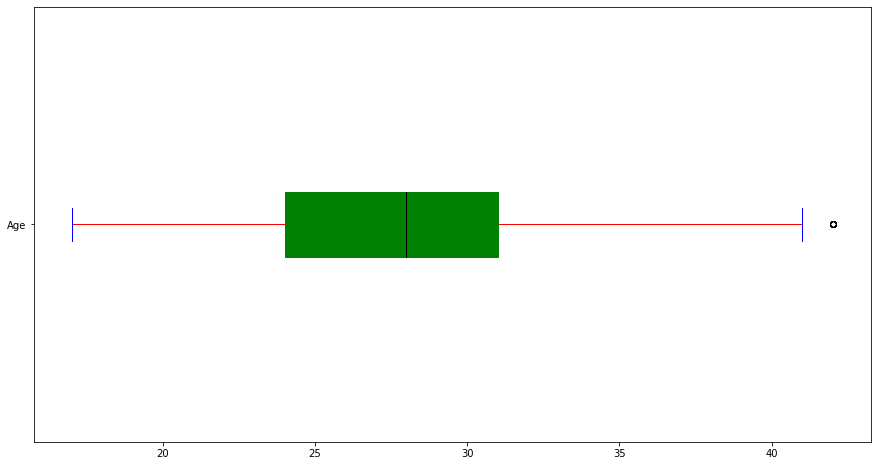

In [462]:
props2 = dict(boxes = 'green', whiskers = 'red', medians = 'black', caps = 'blue')
df_clean['Age'].plot.box(color=props2, patch_artist = True, vert = False)

<AxesSubplot:>

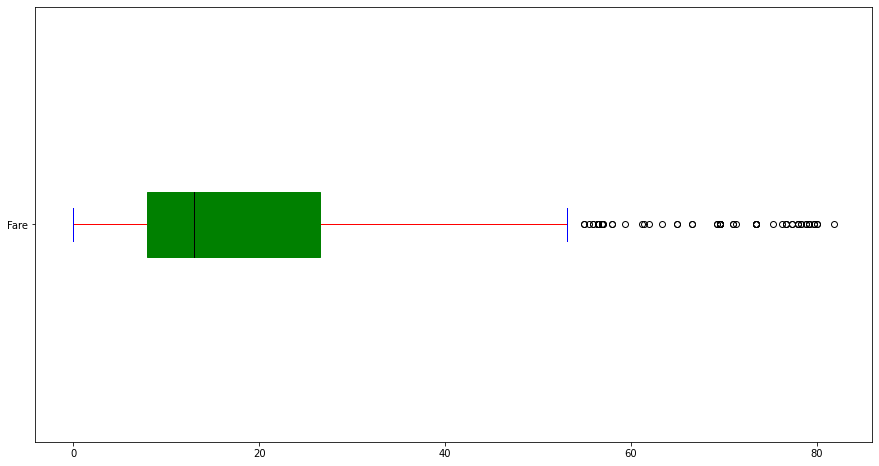

In [463]:
props2 = dict(boxes = 'green', whiskers = 'red', medians = 'black', caps = 'blue')
df_clean['Fare'].plot.box(color=props2, patch_artist = True, vert = False)

<AxesSubplot:>

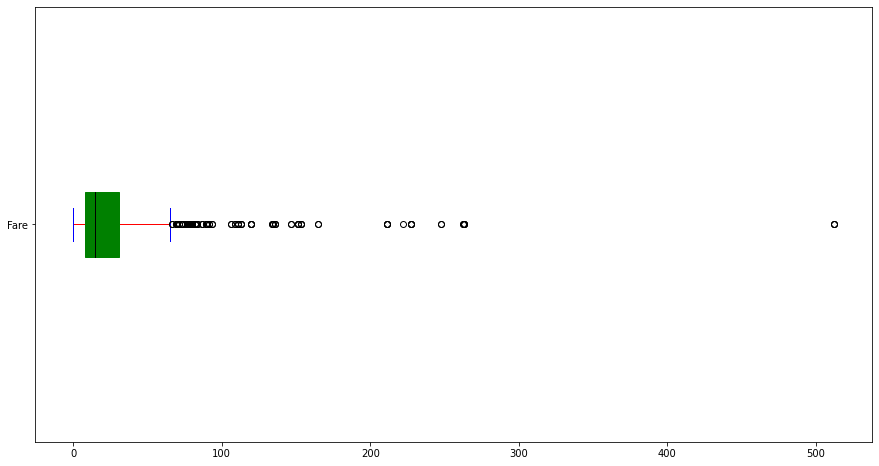

In [464]:
props2 = dict(boxes = 'green', whiskers = 'red', medians = 'black', caps = 'blue')
df['Fare'].plot.box(color=props2, patch_artist = True, vert = False)

In [465]:
df_clean.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [466]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          662 non-null    float64
 6   SibSp        817 non-null    float64
 7   Parch        796 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         818 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


In [275]:
Q1 = np.percentile(df_clean.SibSp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df_clean.SibSp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_clean.SibSp, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q2 50 percentile of the given data is, ', Q2) 
print('Q3 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR # 346
print('low_limit is', low_lim) 
print('up_limit is', up_lim) ###340000.0


Q1 25 percentile of the given data is,  nan
Q2 50 percentile of the given data is,  nan
Q3 75 percentile of the given data is,  nan
Interquartile range is nan
low_limit is nan
up_limit is nan


In [276]:
Q1 = np.percentile(df_clean.SibSp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df_clean.SibSp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_clean.SibSp, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q2 50 percentile of the given data is, ', Q2) 
print('Q3 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR # 346
print('low_limit is', low_lim) 
print('up_limit is', up_lim) ###340000.0


Q1 25 percentile of the given data is,  nan
Q2 50 percentile of the given data is,  nan
Q3 75 percentile of the given data is,  nan
Interquartile range is nan
low_limit is nan
up_limit is nan


In [467]:
Q1 = np.percentile(df_clean.Parch, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df_clean.Parch, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_clean.Parch, 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q2 50 percentile of the given data is, ', Q2) 
print('Q3 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR # 346
print('low_limit is', low_lim) 
print('up_limit is', up_lim) ###340000.0


Q1 25 percentile of the given data is,  nan
Q2 50 percentile of the given data is,  nan
Q3 75 percentile of the given data is,  nan
Interquartile range is nan
low_limit is nan
up_limit is nan


<AxesSubplot:>

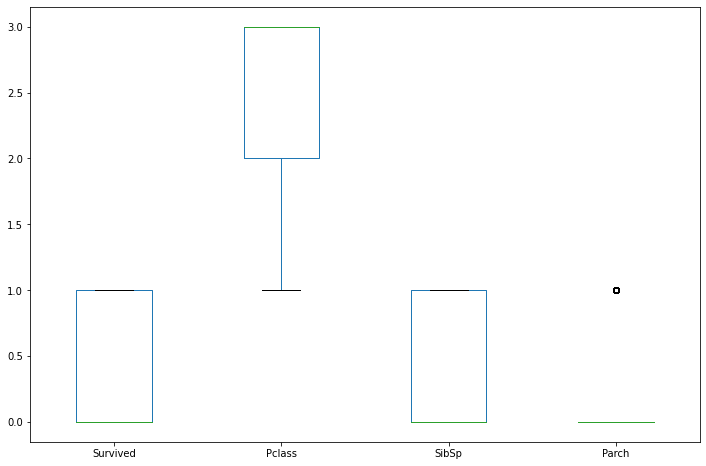

In [468]:
df_clean[numerical_discrete].plot(kind = 'box', figsize = (12, 8))

In [469]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          662 non-null    float64
 6   SibSp        817 non-null    float64
 7   Parch        796 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         818 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


 ### TEST

In [470]:
# read the excel data file 
dft = pd.read_csv("C:\\Users\\USER\\Desktop\\KAGGLECOMP\\test.csv")
# display the top 5 rows of the dataframe
dft.head()

# Note: To display more rows, example 10, use head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [471]:
dft.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

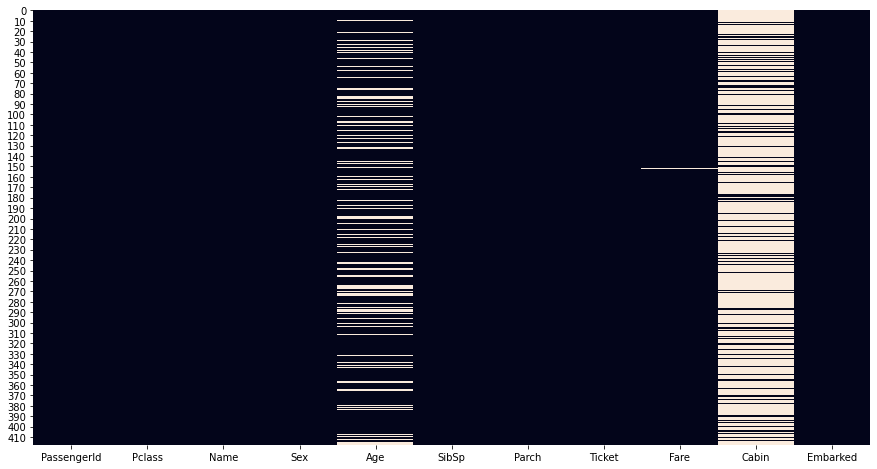

In [472]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(dft.isnull(), cbar=False)

# display the plot
plt.show()

In [473]:
dft['Age'] = dft['Age'].fillna(dft['Age'].median())


In [474]:
del dft['Cabin']

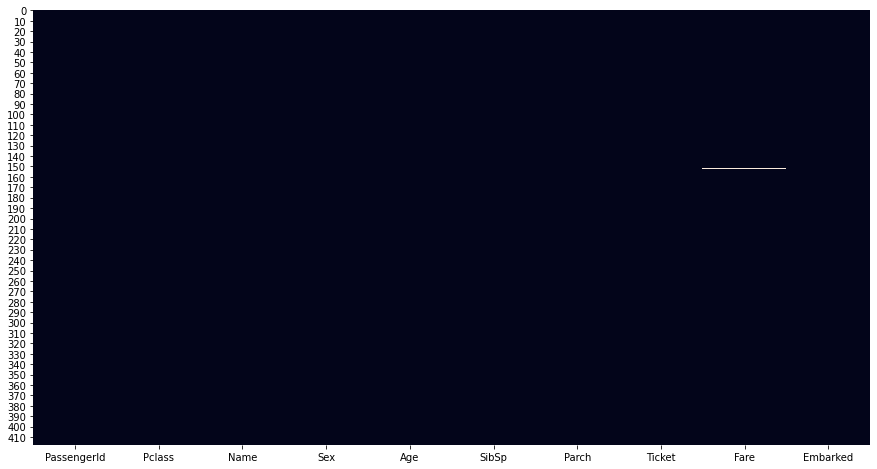

In [475]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(dft.isnull(), cbar=False)

# display the plot
plt.show()

In [476]:
dft['Fare'] = dft['Fare'].fillna(dft['Fare'].median())

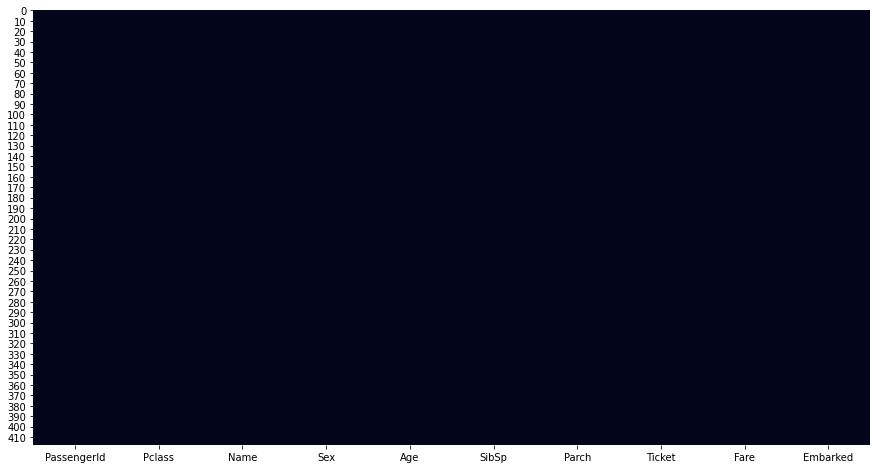

In [477]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(dft.isnull(), cbar=False)

# display the plot
plt.show()

In [478]:
#selecting numerical variables
numerical_features = list(dft.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Id']))
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(dft.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)

Numerical Columns:  ['Age', 'SibSp', 'Pclass', 'Parch', 'Fare', 'PassengerId']

Categorical Columns:  ['Name', 'Sex', 'Ticket', 'Embarked']


In [479]:
#Finding the non-encoded categorical variables
categorical = [var for var in dft.columns if dft[var].dtype == 'O']
print('There are {} categorical-categorical variables'.format(len(categorical)))
categorical

There are 4 categorical-categorical variables


['Name', 'Sex', 'Ticket', 'Embarked']

In [480]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [481]:
# Find all variables that are numerical
numerical = [var for var in dft.columns if dft[var].dtype != 'O']
print('There are {} numerical variables'.format(len(numerical)))

There are 6 numerical variables


In [482]:
"""charges will be used later on as a target for regression analysis, so i'll skip it"""
numerical_continuous = [var for var in numerical if var not in numerical_discrete and var != 'charges']
print('There are {} numerical-continuous variables'.format(len(numerical_continuous))) 
numerical_continuous

There are 3 numerical-continuous variables


['PassengerId', 'Age', 'Fare']

In [483]:
# Extract the numerical-categorical variables from the numerical list
""" numerical_categorical variables are expected to have very few and finite unique variables.20 is used as the
    maximum limit for the numerical_categorical variables in this dataset but is not considered to be the standard"""
numerical_discrete = []

for var in numerical:
      if len(dft[var].unique())<=20:
            print(var, ' values: ', dft[var].unique())
            numerical_discrete.append(var)
print()
print('There are {} numerical-discrete variables'.format(len(numerical_discrete)))

Pclass  values:  [3 2 1]
SibSp  values:  [0 1 2 3 4 5 8]
Parch  values:  [0 1 3 2 4 6 5 9]

There are 3 numerical-discrete variables


<AxesSubplot:>

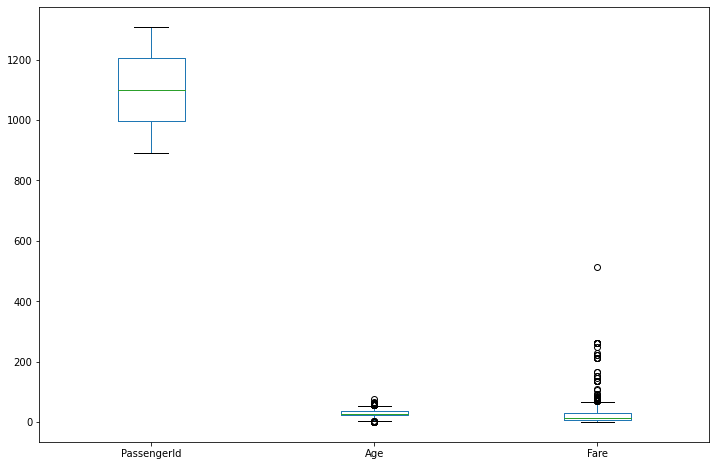

In [484]:
dft[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

<AxesSubplot:>

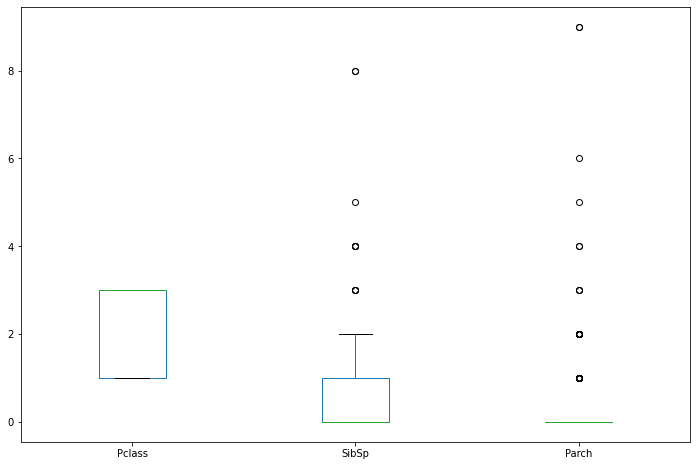

In [485]:
dft[numerical_discrete].plot(kind = 'box', figsize = (12, 8))

In [486]:
from scipy import stats
for var in dft:
    zscore = np.abs(stats.zscore(dft[var]))
    print(zscore)

[1.72791209 1.71962474 1.71133739 1.70305005 1.6947627  1.68647535
 1.678188   1.66990065 1.6616133  1.65332596 1.64503861 1.63675126
 1.62846391 1.62017656 1.61188922 1.60360187 1.59531452 1.58702717
 1.57873982 1.57045248 1.56216513 1.55387778 1.54559043 1.53730308
 1.52901573 1.52072839 1.51244104 1.50415369 1.49586634 1.48757899
 1.47929165 1.4710043  1.46271695 1.4544296  1.44614225 1.4378549
 1.42956756 1.42128021 1.41299286 1.40470551 1.39641816 1.38813082
 1.37984347 1.37155612 1.36326877 1.35498142 1.34669407 1.33840673
 1.33011938 1.32183203 1.31354468 1.30525733 1.29696999 1.28868264
 1.28039529 1.27210794 1.26382059 1.25553325 1.2472459  1.23895855
 1.2306712  1.22238385 1.2140965  1.20580916 1.19752181 1.18923446
 1.18094711 1.17265976 1.16437242 1.15608507 1.14779772 1.13951037
 1.13122302 1.12293567 1.11464833 1.10636098 1.09807363 1.08978628
 1.08149893 1.07321159 1.06492424 1.05663689 1.04834954 1.04006219
 1.03177485 1.0234875  1.01520015 1.0069128  0.99862545 0.99033

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [487]:
dft[numerical_continuous].apply(stats.zscore)

,PassengerId,Age,Fare
0,-1.727912,0.386231,-0.497413
1,-1.719625,1.371370,-0.512278
2,-1.711337,2.553537,-0.464100
3,-1.703050,-0.204852,-0.482475
4,-1.694763,-0.598908,-0.417492
...,...,...,...
413,1.694763,-0.204852,-0.493455
414,1.703050,0.740881,1.314435
415,1.711337,0.701476,-0.507796
416,1.719625,-0.204852,-0.493455


In [488]:
dft[numerical_discrete].apply(stats.zscore)

,Pclass,SibSp,Parch
0,0.873482,-0.499470,-0.400248
1,0.873482,0.616992,-0.400248
2,-0.315819,-0.499470,-0.400248
3,0.873482,-0.499470,-0.400248
4,0.873482,0.616992,0.619896
...,...,...,...
413,0.873482,-0.499470,-0.400248
414,-1.505120,-0.499470,-0.400248
415,0.873482,-0.499470,-0.400248
416,0.873482,-0.499470,-0.400248


In [489]:
dft_clean = dft.copy()

In [490]:
# Treating outliers in the columns that have outliers
zscore_Age = np.abs(stats.zscore(dft['Age']))
dft_clean['Age'] = dft_clean['Age'][(zscore_Age < 1)]
zscore_Fare   = np.abs(stats.zscore(dft['Fare']))
dft_clean['Fare'] = dft_clean['Fare'][(zscore_Fare < 1)]
zscore_SibSp   = np.abs(stats.zscore(dft['SibSp']))
dft_clean['SibSp'] = dft_clean['SibSp'][(zscore_SibSp < 1)]

zscore_Parch    = np.abs(stats.zscore(dft['Parch']))
dft_clean['Parch'] = dft_clean['Parch'][(zscore_Parch  < 1)]


<AxesSubplot:>

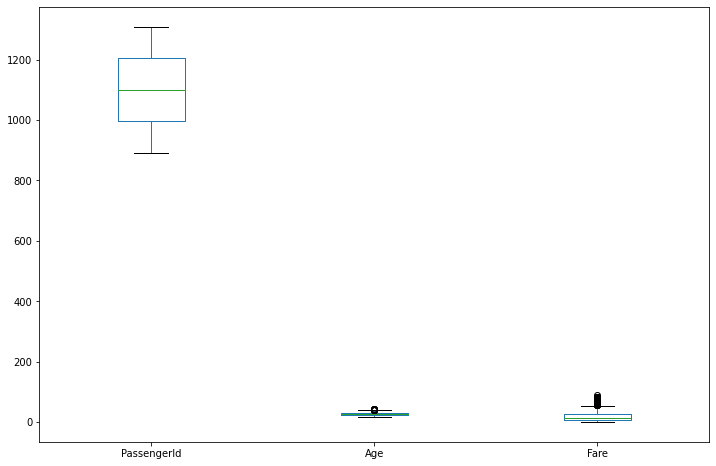

In [491]:
dft_clean[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

<AxesSubplot:>

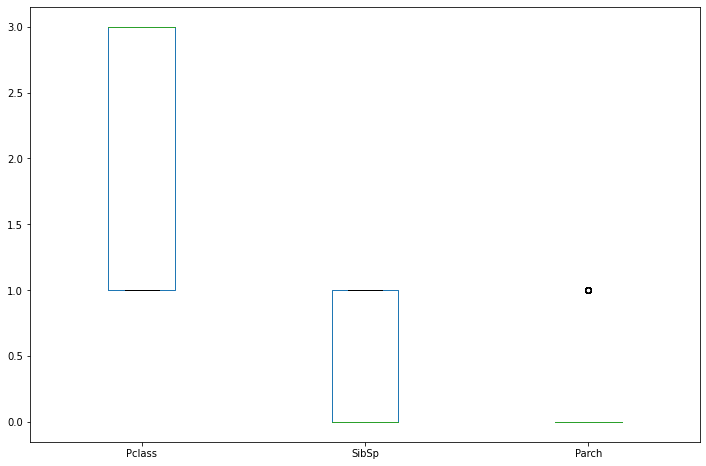

In [492]:
dft_clean[numerical_discrete].plot(kind = 'box', figsize = (12, 8))

In [494]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          318 non-null    float64
 5   SibSp        393 non-null    float64
 6   Parch        376 non-null    float64
 7   Ticket       418 non-null    object 
 8   Fare         385 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 32.8+ KB


In [622]:
test = dft_clean.copy()

In [623]:
train = df_clean.copy()

In [624]:
train.drop(columns=['PassengerId','Name', 'Ticket' ], axis=1, inplace=True)
test.drop(columns= [ 'PassengerId','Name', 'Ticket'], axis=1, inplace= True)

In [625]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       662 non-null    float64
 4   SibSp     817 non-null    float64
 5   Parch     796 non-null    float64
 6   Fare      818 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 55.8+ KB


In [626]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       318 non-null    float64
 3   SibSp     393 non-null    float64
 4   Parch     376 non-null    float64
 5   Fare      385 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 23.0+ KB


In [627]:
test.isnull().sum()

Pclass        0
Sex           0
Age         100
SibSp        25
Parch        42
Fare         33
Embarked      0
dtype: int64

In [628]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         229
SibSp        74
Parch        95
Fare         73
Embarked      2
dtype: int64

### EMBARKED IS A CATEGORICAL VARIABLE WE REPLACE BY MODE

In [629]:
train['Embarked'].mode()[0]

'S'

In [630]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [631]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Age'] = train['Age'].fillna(train['Age'].median())
train['SibSp'] = train['SibSp'].fillna(train['SibSp'].median())
train['Parch'] = train['Parch'].fillna(train['Parch'].median())

In [632]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [633]:
train= pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

test= pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

In [634]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1.0,0.0,7.2500,0,1,1,0,1
1,1,38.0,1.0,0.0,71.2833,0,0,0,0,0
2,1,26.0,0.0,0.0,7.9250,0,1,0,0,1
3,1,35.0,1.0,0.0,53.1000,0,0,0,0,1
4,0,35.0,0.0,0.0,8.0500,0,1,1,0,1


In [635]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0.0,0.0,7.8292,0,1,1,1,0
1,NaN,1.0,0.0,7.0000,0,1,0,0,1
2,NaN,0.0,0.0,9.6875,1,0,1,1,0
3,27.0,0.0,0.0,8.6625,0,1,1,0,1
4,22.0,1.0,1.0,12.2875,0,1,0,0,1


In [636]:
test.isnull().sum()

Age           100
SibSp          25
Parch          42
Fare           33
Pclass_2        0
Pclass_3        0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [637]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
test['SibSp'] = test['SibSp'].fillna(test['SibSp'].median())
test['Parch'] = test['Parch'].fillna(test['Parch'].median())

In [638]:
X_train= train.iloc[:, 1:]
y_train= train['Survived'].values.reshape(-1,1)

X_test= test

In [639]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [640]:
features= ['Age', 'SibSp', 'Fare']

X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])

In [641]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-1.176358,1.806421,0.0,-0.728995,0,1,1,0,1
1,1.938746,1.806421,0.0,2.880523,0,0,0,0,0
2,-0.397582,-0.553581,0.0,-0.690946,0,1,0,0,1
3,1.354664,1.806421,0.0,1.855542,0,0,0,0,1
4,1.354664,-0.553581,0.0,-0.683900,0,1,1,0,1


In [642]:
X_test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.443461,-0.597614,0.0,-0.692377,0,1,1,1,0
1,-0.034413,1.673320,0.0,-0.736129,0,1,0,0,1
2,-0.034413,-0.597614,0.0,-0.594327,1,0,1,1,0
3,-0.034413,-0.597614,0.0,-0.648409,0,1,1,0,1
4,-1.019662,1.673320,1.0,-0.457141,0,1,0,0,1


In [643]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, y_train.ravel())

predictions= clf.predict(X_test)

In [644]:
print(clf.score(X_train, y_train))

0.7901234567901234


In [647]:
submission= pd.DataFrame({'PassengerId' : dft['PassengerId'],'Survived': predictions })

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [648]:
filename= 'titanic predictions.csv'
submission.to_csv(filename, index=False)

###  titanic predictions FILE SAVED IN DOWNLOADS